### User information.

>- msno
- city
- bd: age. Note: this column has outlier values, please use your judgement.
- gender
- registered_via: registration method
- registration_init_time: format %Y%m%d
- expiration_date: format %Y%m%d

### songs 

The songs. Note that data is in unicode.

>- song_id
- song_length: in ms
- genre_ids: genre category. Some songs have multiple genres and they are separated by |
- artist_name
- composer
- lyricist
- language


In [1]:
# load basics library 

import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
import matplotlib.pyplot as plt

plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


## 0) Load Data 

In [17]:
# load data 
members = pd.read_csv('/Users/yennanliu/KKBox_Music_Recommendation/data/members.csv')



### 0-1) members 

In [10]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [98]:
# city 

#.plot(kind='barh')
#plt.xlabel('members count')
#plt.ylabel('city code')
#plt.title('Members City')

pd.DataFrame(members.city.value_counts()).T

,1,13,5,4,15,22,6,14,12,9,...,11,18,10,21,3,17,7,16,20,19
city,19445,3395,2634,1732,1525,1467,913,708,491,309,...,285,259,216,213,204,152,93,35,27,11


In [32]:
# gender 

print ('Total members count : ' , len(members))
print ('Members with gender data count : ' ,len(members[pd.notnull(members['gender'])]))

print ('')
print ('member gender (not-null) : ')
members.gender.value_counts()

Total members count :  34403
Members with gender data count :  14501

member gender (not-null) : 


male      7405
female    7096
Name: gender, dtype: int64

In [33]:
# member register way 

members.registered_via.value_counts()

4     11392
7      9433
9      8628
3      4879
13       70
16        1
Name: registered_via, dtype: int64

In [67]:
def get_timestamp_date(x):
    #year = int(str(x[0:4]))
    #month = int(str(x[4:6]))
    #year = int(str(x[6:8]))
    #date = year + '-' + month + '-' + year
    #return year
    pass
    

In [65]:
# extract time feature 

members['expiration_year'] = members['expiration_date'].apply(lambda x : int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x : int(str(x)[4:6]))
members['expiration_day'] = members['expiration_date'].apply(lambda x : int(str(x)[6:8]))

members['registration_init_year'] = members['registration_init_time'].apply(lambda x : int(str(x)[0:4]))
members['registration_initn_month'] = members['registration_init_time'].apply(lambda x : int(str(x)[4:6]))
members['registration_initn_day'] = members['registration_init_time'].apply(lambda x : int(str(x)[6:8]))



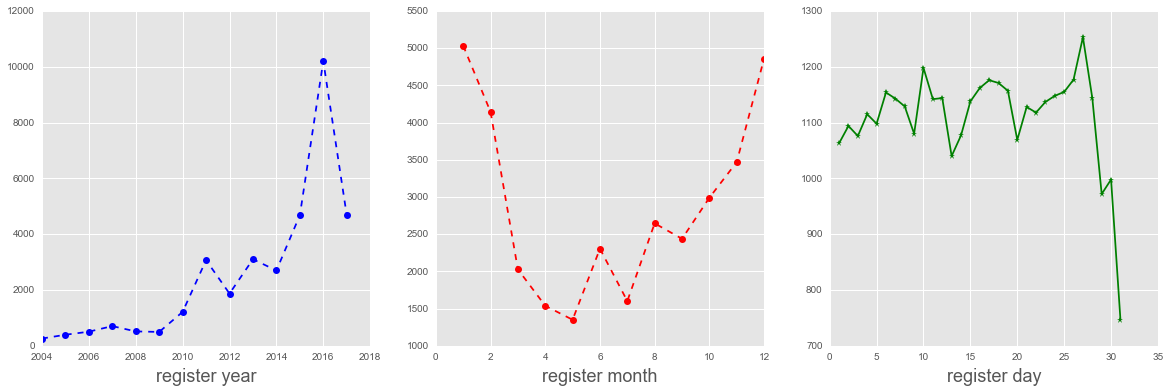

In [89]:
# register time 

fig, ax = plt.subplots(ncols=3, sharey=False)
fig.set_size_inches(20,6)

ax[0].plot(members.groupby('registration_init_year').count()['msno'],'b--o')
ax[1].plot(members.groupby('registration_initn_month').count()['msno'],'r--o')
ax[2].plot(members.groupby('registration_initn_day').count()['msno'],'g-*')


ax[0].set_xlabel( 'register year', fontsize=18)
ax[1].set_xlabel( 'register month', fontsize=18)
ax[2].set_xlabel( 'register day', fontsize=18)

plt.show()


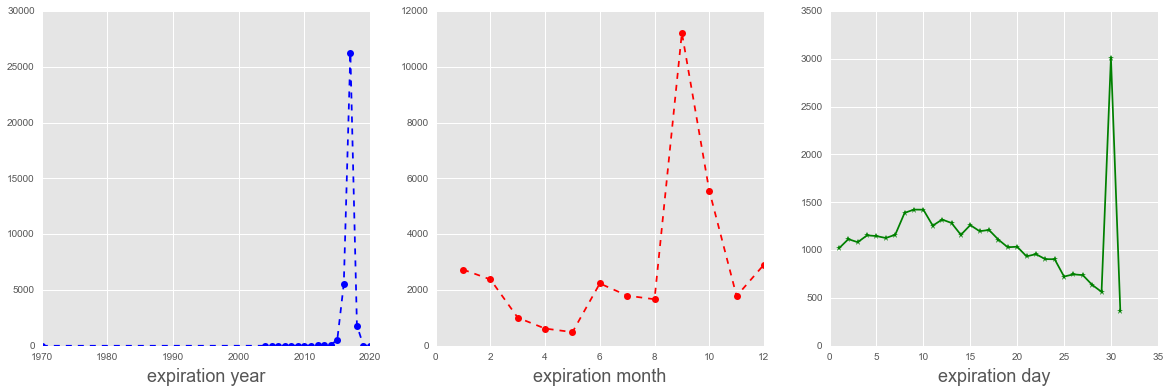

In [90]:
# expire time 

fig, ax = plt.subplots(ncols=3, sharey=False)
fig.set_size_inches(20,6)

ax[0].plot(members.groupby('expiration_year').count()['msno'],'b--o')
ax[1].plot(members.groupby('expiration_month').count()['msno'],'r--o')
ax[2].plot(members.groupby('expiration_day').count()['msno'],'g-*')


ax[0].set_xlabel( 'expiration year', fontsize=18)
ax[1].set_xlabel( 'expiration month', fontsize=18)
ax[2].set_xlabel( 'expiration day', fontsize=18)

plt.show()


In [155]:
#age_.groupby('bd').count()['msno'].reset_index().head(3)
#pd.DataFrame(age_.bd.value_counts())

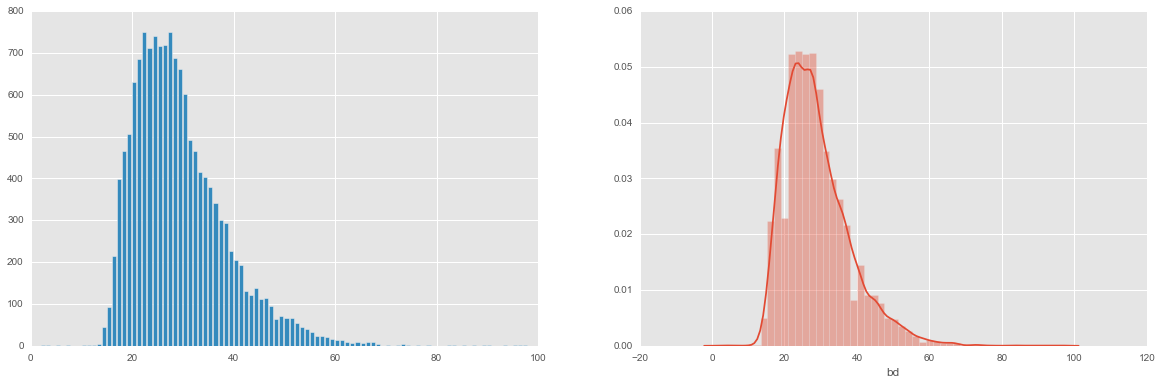

In [156]:
# bd (birthday AKA age)


# many outliers in this column ( NaN, age < 0 or age > 150...)
# filter all them out, and make a distribution plot first
# but how to dealing with them in further modeling still need to be discussed 

age_ = members[(members.bd > 0 ) & (members.bd < 100)]

fig, ax = plt.subplots(ncols=2, sharey=False)
fig.set_size_inches(20,6)

x = age_.groupby('bd').count()['msno'].reset_index().bd
y = age_.groupby('bd').count()['msno'].reset_index().msno

ax[0].bar(x,y)
# hack the plot 
sns.distplot(age_.bd)



In [190]:
print ('Members with "OK" age data  : ', len(age_)) 
print ('Whole member count :  ', len(members)) 

Members with "OK" age data  :  14447
Whole member count :   34403


In [66]:
members.head(3)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date,expiration_year,expiration_month,expiration_day,registration_init_year,registration_initn_month,registration_initn_day
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920,2017,9,20,2011,8,20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622,2017,6,22,2015,6,28
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712,2017,7,12,2016,4,11


### 0-2 ) Songs

In [159]:
# load data 
songs = pd.read_csv('/Users/yennanliu/KKBox_Music_Recommendation/data/songs.csv')


In [160]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
song_id        object
song_length    int64
genre_ids      object
artist_name    object
composer       object
lyricist       object
language       float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [186]:
#songs.song_id.drop_duplicates
print ('Total Songs count : ', len(songs))

Total Songs count :  2296320


In [165]:
# song lenth

songs['song_length_sec'] = songs.song_length.map(lambda x : x*(0.001))


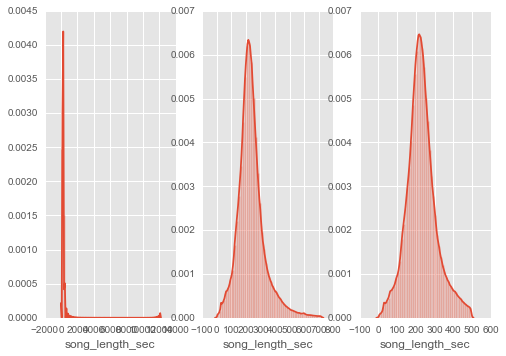

In [178]:
# Plotting multiple different plots in one figure using Seaborn
# https://stackoverflow.com/questions/38082602/plotting-multiple-different-plots-in-one-figure-using-seaborn

fig, axs = plt.subplots(ncols=3)

sns.distplot(songs.song_length_sec, ax=axs[0])
sns.distplot(songs[songs.song_length_sec < songs.song_length_sec.quantile(.99)].song_length_sec, ax=axs[1])
sns.distplot(songs[songs.song_length_sec < songs.song_length_sec.quantile(.97)].song_length_sec, ax=axs[2])

#ax[0].set_xlabel( 'song length (all data)', fontsize=18)
#ax[1].set_xlabel( 'song length (data song length  < top 99%)', fontsize=18)
#ax[2].set_xlabel( 'song length (data song length  < top 97%)', fontsize=18)



In [187]:
# language 

songs.language.value_counts()

 52.0    1336694
-1.0      639467
 3.0      106295
 17.0      92518
 24.0      41744
 31.0      39201
 10.0      15482
 45.0      14435
 59.0       8098
 38.0       2385
Name: language, dtype: int64

In [195]:
print ('Total songs count : ' , len(songs))
print ('songs with language data count : ' ,len(songs[pd.notnull(songs['language'])]))


Total songs count :  2296320
songs with language data count :  2296319


In [202]:
# artist_name
songs.artist_name.value_counts().head(10)
#songs.artist_name.value_counts().tail(10)

Various Artists       145916
証聲音樂圖書館 ECHO MUSIC     11276
Billy Vaughn            4828
รวมศิลปิน               4432
Richard Clayderman      4180
Elvis Presley           4038
Nat King Cole           3806
Billie Holiday          3674
Frank Sinatra           3594
Armin van Buuren        2818
Name: artist_name, dtype: int64

In [205]:
# composer
songs.composer.value_counts().head(10)

Neuromancer                17888
Johann Sebastian Bach      12105
Wolfgang Amadeus Mozart    10839
Marco Rinaldo              10803
Traditional                10105
Ludwig van Beethoven        7290
佚名                          6259
Sacchetto G.                5479
Frédéric Chopin             5468
Antonio Vivaldi             3376
Name: composer, dtype: int64

In [209]:
# lyricist
# A lyricist or lyrist is a person who writes lyrics—words for songs—
# as opposed to a composer, who writes the song's melody. 
#songs.lyricist.value_counts()

In [217]:
# genre_ids : genre category 
# Some songs have multiple genres and they are separated by |
# this may be a good label made by various ways, can be good to classification
# but maybe some genres are not make sense in cases 
# need to check later 

songs.genre_ids.value_counts().head(3)


465     567911
958     176349
2022    168870
Name: genre_ids, dtype: int64

In [218]:
#songs.genre_ids.value_counts().plot()
#plt.xlim(0,30)

In [208]:
songs.head(100) #.sort_values('language')

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,song_length_sec
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,247.640
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,197.328
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0,231.781
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0,273.554
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0,140.329
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0,235.520
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0,226.220
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0,276.793
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0,228.623
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0,232.629


In [161]:
songs.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0
